# Milestone #3: Brett Pfliger

## How did the Buffalo Sabers and Vancouver Canucks play before and after their Covid-19 outbreaks and is there any correlation?

I am a huge hockey fan and am curious to see how the Buffalo Sabers and Vancouver Canucks played after their Covid-19 outbreaks. Both of these teams experianced the most time off due to their outbreaks compared to many other teams and I want to see if that resulted in them playing worse when coming back. 

In [1]:
import pandas as pd
data = pd.read_csv("../data/raw/Games - Natural Stat TrickTeam Season Totals - Natural Stat Trick.csv")
data

,Game,Team,Unnamed: 2,TOI,CF,CA,CF%,SCF,SCA,SCF%,SH%,SV%,PDO
0,"2021-01-13 - Blackhawks 1, Lightning 5",Chicago Blackhawks,Limited ReportFull Report,45.583333,33,34,49.25,19,24,44.19,0.00,86.36,0.864
1,"2021-01-13 - Blackhawks 1, Lightning 5",Tampa Bay Lightning,Limited ReportFull Report,45.583333,34,33,50.75,24,19,55.81,13.64,100.00,1.136
2,"2021-01-13 - Blues 4, Avalanche 1",Colorado Avalanche,Limited ReportFull Report,50.683333,44,43,50.57,11,22,33.33,0.00,85.19,0.852
3,"2021-01-13 - Blues 4, Avalanche 1",St Louis Blues,Limited ReportFull Report,50.683333,43,44,49.43,22,11,66.67,14.81,100.00,1.148
4,"2021-01-13 - Canadiens 4, Maple Leafs 5",Montreal Canadiens,Limited ReportFull Report,48.600000,47,52,47.47,25,30,45.45,9.09,90.00,0.991
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731,"2021-05-16 - Flames 6, Canucks 5",Vancouver Canucks,Limited ReportFull Report,40.966667,32,50,39.02,17,19,47.22,8.70,78.26,0.870
1732,"2021-05-18 - Flames 2, Canucks 4",Calgary Flames,Limited ReportFull Report,47.416667,43,37,53.75,25,17,59.52,3.33,86.36,0.897
1733,"2021-05-18 - Flames 2, Canucks 4",Vancouver Canucks,Limited ReportFull Report,47.416667,37,43,46.25,17,25,40.48,13.64,96.67,1.103
1734,"2021-05-19 - Canucks 2, Flames 6",Calgary Flames,Limited ReportFull Report,44.483333,43,35,55.13,30,18,62.50,24.00,94.44,1.184


# Task 1

## Conducting an EDA:

In [2]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

print("How many rows and columns are there:", data.shape)
print("Columns included in this dataset:", data.columns)

How many rows and columns are there: (1736, 13)
Columns included in this dataset: Index(['Game', 'Team', 'Unnamed: 2', 'TOI', 'CF', 'CA', 'CF%', 'SCF', 'SCA',
       'SCF%', 'SH%', 'SV%', 'PDO'],
      dtype='object')


In [3]:
data.describe(include='float64').T

,count,mean,std,min,25%,50%,75%,max
TOI,1736.0,48.557661,4.241102,31.783333,45.6625,48.933333,51.500,68.200
CF%,1736.0,50.000035,8.153142,25.270000,44.1600,50.000000,55.840,74.730
SCF%,1736.0,50.000063,10.623748,14.810000,43.1700,50.000000,56.830,85.190
SH%,1736.0,8.458710,6.235143,0.000000,4.1700,7.690000,12.500,50.000
SV%,1736.0,91.541394,6.235157,50.000000,87.5000,92.310000,95.830,100.000
PDO,1736.0,1.000009,0.091223,0.553000,0.9420,1.000000,1.058,1.447


In [4]:
data.describe(include='object').T

,count,unique,top,freq
Game,1736,868,"2021-01-13 - Blackhawks 1, Lightning 5",2
Team,1736,31,Chicago Blackhawks,56
Unnamed: 2,1736,1,Limited ReportFull Report,1736


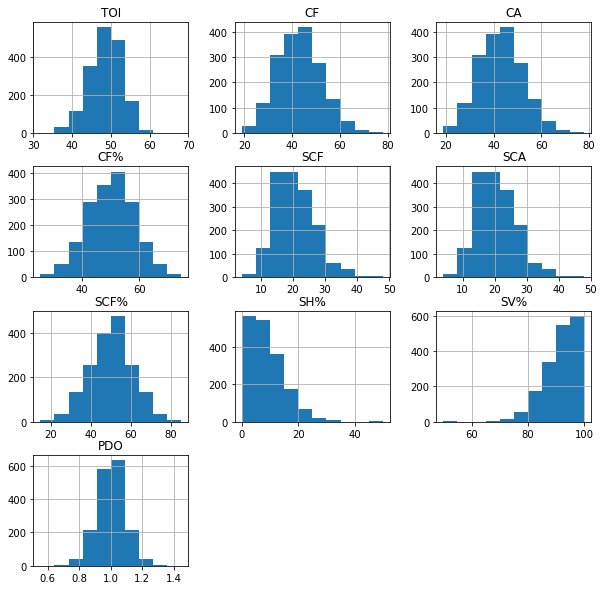

In [5]:
Histogram = data.hist(bins=10, figsize=(10,10))

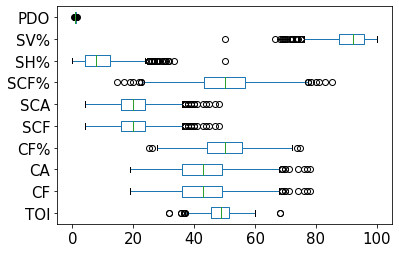

In [6]:
boxplotforya = data.boxplot(grid=False, vert=False,fontsize=15)

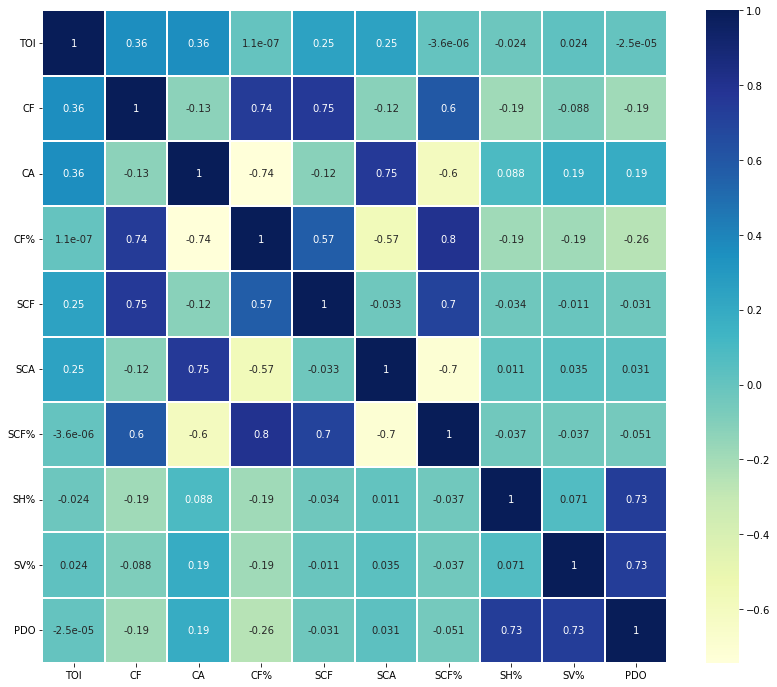

In [7]:
plt.figure(figsize=(14,12))
sns.heatmap(data.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

# Task 2

## Analysis Pipline:

### In this step, 
- I dropped the columns of 'CF', 'CA', 'SCF', 'SCA', 'PDO', 'Unnamed: 2' as we don't need them

In [8]:
df = data.drop(columns =['CF','CA','SCF','SCA','TOI', 'Unnamed: 2'])
df.shape

(1736, 7)

### In this step for the Vancouver Canucks,
- I dropped all the teams except the Vancouver Canucks to create its own dataframe
- Reset index to make it easier to drop games that arn't needed 
- Dropped all of the games that arn't needed. Know we have Vancouvers 10 games before and 10 games after their outbreak
- Reset index to make it easier to analyze Vancouvers Games and droped the column it added of 'level_0'
- This dataframe gives me the 10 games before the Vancouver Canucks Covid outbreak
- This dataframe gives me the 10 games after the Vancouver Canucks Covid outbreak
- I then reset the index again for both before and after
- Renamed columns to before and after for both

In [9]:
Canucks = df.drop(data[data.Team.isin(["Arizona Coyotes", "Buffalo Sabres", "Boston Bruins", "Carolina Hurricanes", "Columbus Blue Jackets", "Calgary Flames", "Chicago Blackhawks", "Colorado Avalanche", "Dallas Stars", "Detroit Red Wings", "Florida Panthers", "Los Angeles Kings", "Minnesota Wild", "Nashville Predators", "Pittsburgh Penguins", "San Jose Sharks", "Tampa Bay Lightning", "St Louis Blues", "Vegas Golden Knights", "Edmonton Oilers", "Montreal Canadiens", "New Jersey Devils", "New York Islanders", "New York Rangers", "Ottawa Senators", "Philadelphia Flyers", "Toronto Maple Leafs", "Winnipeg Jets", "Washington Capitals", "Anaheim Ducks"])].index)
Canucks1 = Canucks.reset_index()
Canucks2 = Canucks1.drop(Canucks1.index[0:27]).drop(Canucks1.index[47:56])
Canucks3 = Canucks2.reset_index().drop(columns = "index")
Canucks4 = Canucks3.drop(columns =['level_0'])
CanucksBefore = Canucks4.drop(Canucks3.index[10:20])
CanucksBefore1 = CanucksBefore.reset_index()
CanucksBefore2 = CanucksBefore1.rename(columns={'CF%':"CF% Before",'SCF%':"SCF% Before",'SH%':"SH% Before",'SV%':"SV% Before",'PDO':"PDO Before"}).drop(columns="Team")
CanucksAfter = Canucks4.drop(Canucks3.index[0:10]).drop(Canucks3.index[20:20])
CanucksAfter1 = CanucksAfter.reset_index()
CanucksAfter2 = CanucksAfter1.rename(columns={'CF%':"CF% After",'SCF%':"SCF% After",'SH%':"SH% After",'SV%':"SV% After",'PDO':"PDO After"}).drop(columns="Team")

### In this step for the Vancouver Canucks,
- I added the two seperate data frames of the 10 games before and 10 games after to make the visulization process easier

In [10]:
CanucksBeforeAndAfter = pd.concat([CanucksBefore2,CanucksAfter2], axis=1)

### In this step for the Buffalo Sabres, 
- I dropped all of the teams except the Buffalo Sabres to create its own dataframe
- Reset index to make it easier to drop games that arn't needed for the Buffalo Sabres
- Dropped all of the games that arn't needed. Know we have Buffalos 10 games before and 10 games after their outbreak
- This dataframe gives me the 10 games before the buffalo Sabres Covid outbreak
- This dataframe gives me the 10 games after the Buffalo Sabres Covid outbreak
- I then reset the index again for both before and after
- Renamed columns to before and after for both

In [11]:
Sabres = df.drop(data[data.Team.isin(["Arizona Coyotes", "Vancouver Canucks",  "Boston Bruins", "Carolina Hurricanes", "Columbus Blue Jackets", "Calgary Flames", "Chicago Blackhawks", "Colorado Avalanche", "Dallas Stars", "Detroit Red Wings", "Florida Panthers", "Los Angeles Kings", "Minnesota Wild", "Nashville Predators", "Pittsburgh Penguins", "San Jose Sharks", "Tampa Bay Lightning", "St Louis Blues", "Vegas Golden Knights", "Edmonton Oilers", "Montreal Canadiens", "New Jersey Devils", "New York Islanders", "New York Rangers", "Ottawa Senators", "Philadelphia Flyers", "Toronto Maple Leafs", "Winnipeg Jets", "Washington Capitals", "Anaheim Ducks"])].index)
Sabres1 = Sabres.reset_index()
Sabres2 = Sabres1.drop(Sabres1.index[20:])
SabresBefore = Sabres2.drop(Sabres2.index[10:20])
SabresBefore1 = SabresBefore.reset_index()
SabresBefore2 = SabresBefore1.rename(columns={'CF%':"CF% Before",'SCF%':"SCF% Before",'SH%':"SH% Before",'SV%':"SV% Before",'PDO':"PDO Before"}).drop(columns="Team")
SabresAfter = Sabres2.drop(Sabres2.index[0:10]).drop(Sabres2.index[20:])
SabresAfter1 = SabresAfter.reset_index()
SabresAfter2 = SabresAfter1.rename(columns={'CF%':"CF% After",'SCF%':"SCF% After",'SH%':"SH% After",'SV%':"SV% After",'PDO':"PDO After"}).drop(columns="Team")

### In this step for the Buffalo Sabres,
- I added the two seperate data frames of the 10 games before and 10 games after to make the visulization process easier

In [12]:
SabresBeforeAndAfter = pd.concat([SabresBefore2,SabresAfter2], axis=1)

### Final Dataframe for Tableau 
- Combining Canucks and Sabres dataframes into one for Tableau program
- Renamed columns for this process

In [66]:
FCBandA = CanucksBandA.drop(columns = "Game")
FCBandA1 = FCBandA[['CF% Before', 'CF% After', 'SCF% Before', 'SCF% After', 'SV% Before', 'SV% After', 'SH% Before', 'SH% After', 'PDO Before', 'PDO After']]
FSBandA = SabresBandA.drop(columns = "Game")
FSBandA1 = FSBandA[['CF% Before', 'CF% After', 'SCF% Before', 'SCF% After', 'SV% Before', 'SV% After', 'SH% Before', 'SH% After', 'PDO Before', 'PDO After']]
CanucksColumn = CanucksBandA.rename(columns = {"CF% Before" : "Canucks CF% Before", "SCF% Before" : "Canucks SCF% Before", "SH% Before" : "Canucks SH% Before", "SV% Before" : "Canucks SV% Before", "PDO Before" : "Canucks PDO Before", "CF% After" : "Canucks CF% After", "SCF% After" : "Canucks SCF% After", "SH% After" : "Canucks SH% After", "SV% After" : "Canucks SV% After", "PDO After" : "Canucks PDO After"})
SabresColumn = SabresBandA.rename(columns = {"CF% Before" : "Sabres CF% Before", "SCF% Before" : "Sabres SCF% Before", "SH% Before" : "Sabres SH% Before", "SV% Before" : "Sabres SV% Before", "PDO Before" : "Sabres PDO Before", "CF% After" : "Sabres CF% After", "SCF% After" : "Sabres SCF% After", "SH% After" : "Sabres SH% After", "SV% After" : "Sabres SV% After", "PDO After" : "Sabres PDO After"})
FinalCovidDataFrame = pd.concat([CanucksColumn,SabresColumn], axis=1)

# Task 3

## Method Chaining: 

In [13]:
import project_functions1 as pf1

In [67]:
DataFrameProcessed = pf1.load_and_process(path_to_csv_file = "../data/raw/Games - Natural Stat TrickTeam Season Totals - Natural Stat Trick.csv")
DataFrameProcessed

,Game,Team,CF%,SCF%,SH%,SV%,PDO
0,"2021-01-13 - Blackhawks 1, Lightning 5",Chicago Blackhawks,49.25,44.19,0.00,86.36,0.864
1,"2021-01-13 - Blackhawks 1, Lightning 5",Tampa Bay Lightning,50.75,55.81,13.64,100.00,1.136
2,"2021-01-13 - Blues 4, Avalanche 1",Colorado Avalanche,50.57,33.33,0.00,85.19,0.852
3,"2021-01-13 - Blues 4, Avalanche 1",St Louis Blues,49.43,66.67,14.81,100.00,1.148
4,"2021-01-13 - Canadiens 4, Maple Leafs 5",Montreal Canadiens,47.47,45.45,9.09,90.00,0.991
...,...,...,...,...,...,...,...
1731,"2021-05-16 - Flames 6, Canucks 5",Vancouver Canucks,39.02,47.22,8.70,78.26,0.870
1732,"2021-05-18 - Flames 2, Canucks 4",Calgary Flames,53.75,59.52,3.33,86.36,0.897
1733,"2021-05-18 - Flames 2, Canucks 4",Vancouver Canucks,46.25,40.48,13.64,96.67,1.103
1734,"2021-05-19 - Canucks 2, Flames 6",Calgary Flames,55.13,62.50,24.00,94.44,1.184


In [68]:
CanucksBeforeFinal = pf1.Canucks_Before_Data(DataFrameProcessed)
CanucksBeforeFinal

,index,Game,CF% Before,SCF% Before,SH% Before,SV% Before,PDO Before
0,0,"2021-03-06 - Maple Leafs 2, Canucks 4",42.48,41.51,8.00,94.59,1.026
1,1,"2021-03-08 - Canadiens 1, Canucks 2",39.58,40.00,0.00,100.00,1.000
2,2,"2021-03-10 - Canadiens 5, Canucks 1",34.69,24.00,0.00,89.19,0.892
3,3,"2021-03-13 - Oilers 1, Canucks 2",46.81,41.03,5.00,100.00,1.050
4,4,"2021-03-15 - Canucks 3, Senators 2",40.35,40.32,7.69,97.62,1.053
5,5,"2021-03-17 - Canucks 3, Senators 2",38.68,37.50,7.69,92.31,1.000
6,6,"2021-03-19 - Canucks 3, Canadiens 2",46.15,42.86,8.00,100.00,1.080
7,7,"2021-03-20 - Canucks 4, Canadiens 5",32.04,22.92,23.08,91.18,1.143
8,8,"2021-03-22 - Jets 4, Canucks 0",47.79,42.86,0.00,85.71,0.857
9,9,"2021-03-24 - Jets 5, Canucks 1",62.11,62.22,3.13,91.30,0.944


In [69]:
CanucksAfterFinal = pf1.Canucks_After_Data(DataFrameProcessed)
CanucksAfterFinal

,index,Game,CF% After,SCF% After,SH% After,SV% After,PDO After
0,10,"2021-04-18 - Maple Leafs 2, Canucks 3",35.87,33.33,12.50,96.77,1.093
1,11,"2021-04-20 - Maple Leafs 3, Canucks 6",50.53,45.83,16.00,96.97,1.130
2,12,"2021-04-22 - Senators 3, Canucks 0",59.26,55.00,0.00,100.00,1.000
3,13,"2021-04-24 - Senators 2, Canucks 4",42.53,32.43,8.70,88.89,0.976
4,14,"2021-04-26 - Canucks 1, Senators 2",44.05,30.00,4.55,91.67,0.962
5,15,"2021-04-28 - Canucks 3, Senators 6",40.22,28.95,16.67,81.48,0.981
6,16,"2021-04-29 - Canucks 1, Maple Leafs 4",42.55,40.00,0.00,83.33,0.833
7,17,"2021-05-01 - Canucks 1, Maple Leafs 5",52.27,48.98,4.35,86.21,0.906
8,18,"2021-05-03 - Oilers 5, Canucks 3",40.20,37.25,10.00,87.10,0.971
9,19,"2021-05-04 - Oilers 4, Canucks 1",48.28,42.86,4.55,90.48,0.950


In [70]:
CanucksBandA = pf1.Canucks_Before_And_After(DataFrameProcessed)
CanucksBandA

,Game,CF% Before,SCF% Before,SH% Before,SV% Before,PDO Before,Game,CF% After,SCF% After,SH% After,SV% After,PDO After
0,"2021-03-06 - Maple Leafs 2, Canucks 4",42.48,41.51,8.00,94.59,1.026,"2021-04-18 - Maple Leafs 2, Canucks 3",35.87,33.33,12.50,96.77,1.093
1,"2021-03-08 - Canadiens 1, Canucks 2",39.58,40.00,0.00,100.00,1.000,"2021-04-20 - Maple Leafs 3, Canucks 6",50.53,45.83,16.00,96.97,1.130
2,"2021-03-10 - Canadiens 5, Canucks 1",34.69,24.00,0.00,89.19,0.892,"2021-04-22 - Senators 3, Canucks 0",59.26,55.00,0.00,100.00,1.000
3,"2021-03-13 - Oilers 1, Canucks 2",46.81,41.03,5.00,100.00,1.050,"2021-04-24 - Senators 2, Canucks 4",42.53,32.43,8.70,88.89,0.976
4,"2021-03-15 - Canucks 3, Senators 2",40.35,40.32,7.69,97.62,1.053,"2021-04-26 - Canucks 1, Senators 2",44.05,30.00,4.55,91.67,0.962
5,"2021-03-17 - Canucks 3, Senators 2",38.68,37.50,7.69,92.31,1.000,"2021-04-28 - Canucks 3, Senators 6",40.22,28.95,16.67,81.48,0.981
6,"2021-03-19 - Canucks 3, Canadiens 2",46.15,42.86,8.00,100.00,1.080,"2021-04-29 - Canucks 1, Maple Leafs 4",42.55,40.00,0.00,83.33,0.833
7,"2021-03-20 - Canucks 4, Canadiens 5",32.04,22.92,23.08,91.18,1.143,"2021-05-01 - Canucks 1, Maple Leafs 5",52.27,48.98,4.35,86.21,0.906
8,"2021-03-22 - Jets 4, Canucks 0",47.79,42.86,0.00,85.71,0.857,"2021-05-03 - Oilers 5, Canucks 3",40.20,37.25,10.00,87.10,0.971
9,"2021-03-24 - Jets 5, Canucks 1",62.11,62.22,3.13,91.30,0.944,"2021-05-04 - Oilers 4, Canucks 1",48.28,42.86,4.55,90.48,0.950


In [71]:
SabresBeforeFinal = pf1.Sabres_Before_Data(DataFrameProcessed)
SabresBeforeFinal

,index,Game,CF% Before,SCF% Before,SH% Before,SV% Before,PDO Before
0,0,"2021-01-14 - Capitals 6, Sabres 4",51.47,55.17,10.53,80.95,0.915
1,1,"2021-01-15 - Capitals 2, Sabres 1",51.43,55.56,4.55,90.48,0.950
2,2,"2021-01-18 - Sabres 6, Flyers 1",49.00,54.55,12.90,95.24,1.081
3,3,"2021-01-19 - Sabres 0, Flyers 3",59.38,58.14,0.00,91.67,0.917
4,4,"2021-01-22 - Sabres 3, Capitals 4",53.85,61.29,13.64,88.00,1.016
5,5,"2021-01-24 - Sabres 4, Capitals 3",56.18,42.86,0.00,94.74,0.947
6,6,"2021-01-26 - Rangers 2, Sabres 3",50.79,63.33,6.67,91.30,0.980
7,7,"2021-01-28 - Rangers 3, Sabres 2",41.67,37.04,5.00,96.15,1.012
8,8,"2021-01-30 - Devils 3, Sabres 4",49.32,51.72,10.00,90.48,1.005
9,9,"2021-01-31 - Devils 5, Sabres 3",43.75,36.36,4.35,88.24,0.926


In [72]:
SabresAfterFinal = pf1.Sabres_After_Data(DataFrameProcessed)
SabresAfterFinal

,index,Game,CF% After,SCF% After,SH% After,SV% After,PDO After
0,10,"2021-02-15 - Islanders 3, Sabres 1",44.05,37.93,0.00,92.00,0.920
1,11,"2021-02-16 - Islanders 3, Sabres 0",57.14,54.76,0.00,89.47,0.895
2,12,"2021-02-18 - Sabres 1, Capitals 3",48.78,44.74,0.00,94.12,0.941
3,13,"2021-02-20 - Sabres 3, Devils 2",50.00,52.63,7.41,95.45,1.029
4,14,"2021-02-22 - Sabres 2, Islanders 3",48.19,44.68,4.35,90.48,0.948
5,15,"2021-02-23 - Sabres 4, Devils 1",47.12,53.06,6.25,100.00,1.063
6,16,"2021-02-25 - Devils 4, Sabres 3",40.45,26.67,4.35,93.94,0.983
7,17,"2021-02-27 - Flyers 3, Sabres 0",45.98,50.00,0.00,90.32,0.903
8,18,"2021-02-28 - Flyers 3, Sabres 0",44.30,40.00,0.00,90.32,0.903
9,19,"2021-03-02 - Sabres 2, Rangers 3",63.22,60.00,10.53,82.35,0.929


In [73]:
SabresBandA = pf1.Sabres_Before_After(DataFrameProcessed)
SabresBandA

,Game,CF% Before,SCF% Before,SH% Before,SV% Before,PDO Before,Game,CF% After,SCF% After,SH% After,SV% After,PDO After
0,"2021-01-14 - Capitals 6, Sabres 4",51.47,55.17,10.53,80.95,0.915,"2021-02-15 - Islanders 3, Sabres 1",44.05,37.93,0.00,92.00,0.920
1,"2021-01-15 - Capitals 2, Sabres 1",51.43,55.56,4.55,90.48,0.950,"2021-02-16 - Islanders 3, Sabres 0",57.14,54.76,0.00,89.47,0.895
2,"2021-01-18 - Sabres 6, Flyers 1",49.00,54.55,12.90,95.24,1.081,"2021-02-18 - Sabres 1, Capitals 3",48.78,44.74,0.00,94.12,0.941
3,"2021-01-19 - Sabres 0, Flyers 3",59.38,58.14,0.00,91.67,0.917,"2021-02-20 - Sabres 3, Devils 2",50.00,52.63,7.41,95.45,1.029
4,"2021-01-22 - Sabres 3, Capitals 4",53.85,61.29,13.64,88.00,1.016,"2021-02-22 - Sabres 2, Islanders 3",48.19,44.68,4.35,90.48,0.948
5,"2021-01-24 - Sabres 4, Capitals 3",56.18,42.86,0.00,94.74,0.947,"2021-02-23 - Sabres 4, Devils 1",47.12,53.06,6.25,100.00,1.063
6,"2021-01-26 - Rangers 2, Sabres 3",50.79,63.33,6.67,91.30,0.980,"2021-02-25 - Devils 4, Sabres 3",40.45,26.67,4.35,93.94,0.983
7,"2021-01-28 - Rangers 3, Sabres 2",41.67,37.04,5.00,96.15,1.012,"2021-02-27 - Flyers 3, Sabres 0",45.98,50.00,0.00,90.32,0.903
8,"2021-01-30 - Devils 3, Sabres 4",49.32,51.72,10.00,90.48,1.005,"2021-02-28 - Flyers 3, Sabres 0",44.30,40.00,0.00,90.32,0.903
9,"2021-01-31 - Devils 5, Sabres 3",43.75,36.36,4.35,88.24,0.926,"2021-03-02 - Sabres 2, Rangers 3",63.22,60.00,10.53,82.35,0.929


In [74]:
CovidDescribeCBF = pf1.Describe(CanucksBeforeFinal)
CovidDescribeCBF

,count,mean,std,min,25%,50%,75%,max
index,10.0,4.5000,3.027650,0.000,2.2500,4.500,6.75000,9.000
CF% Before,10.0,43.0680,8.428510,32.040,38.9050,41.415,46.64500,62.110
SCF% Before,10.0,39.5220,10.879249,22.920,38.1250,40.675,42.52250,62.220
SH% Before,10.0,6.2590,6.847584,0.000,0.7825,6.345,7.92250,23.080
SV% Before,10.0,94.1900,5.066779,85.710,91.2100,93.450,99.40500,100.000
PDO Before,10.0,1.0045,0.086846,0.857,0.9580,1.013,1.05225,1.143


In [75]:
CovidDescribeCAF = pf1.Describe(CanucksAfterFinal)
CovidDescribeCAF

,count,mean,std,min,25%,50%,75%,max
index,10.0,14.5000,3.027650,10.000,12.2500,14.5000,16.75000,19.00
CF% After,10.0,45.5760,6.963981,35.870,40.7975,43.3000,49.96750,59.26
SCF% After,10.0,39.4630,8.669128,28.950,32.6550,38.6250,45.08750,55.00
SH% After,10.0,7.7320,6.039851,0.000,4.4000,6.6250,11.87500,16.67
SV% After,10.0,90.2900,6.125335,81.480,86.4325,89.6850,95.49500,100.00
PDO After,10.0,0.9802,0.084377,0.833,0.9530,0.9735,0.99525,1.13


In [76]:
CovidDescribeSBF = pf1.Describe(SabresBeforeFinal)
CovidDescribeSBF

,count,mean,std,min,25%,50%,75%,max
index,10.0,4.5000,3.027650,0.000,2.25000,4.500,6.75000,9.000
CF% Before,10.0,50.6840,5.281671,41.670,49.08000,51.110,53.25500,59.380
SCF% Before,10.0,51.6020,9.615050,36.360,45.07500,54.860,57.49500,63.330
SH% Before,10.0,6.7640,4.886915,0.000,4.40000,5.835,10.39750,13.640
SV% Before,10.0,90.7250,4.427581,80.950,88.80000,90.890,93.97250,96.150
PDO Before,10.0,0.9749,0.053733,0.915,0.93125,0.965,1.01025,1.081


In [77]:
CovidDescribeSAF = pf1.Describe(SabresAfterFinal)
CovidDescribeSAF

,count,mean,std,min,25%,50%,75%,max
index,10.0,14.5000,3.027650,10.000,12.25000,14.500,16.75000,19.000
CF% After,10.0,48.9230,6.687160,40.450,44.72000,47.655,49.69500,63.220
SCF% After,10.0,46.4470,9.767542,26.670,41.17000,47.370,52.95250,60.000
SH% After,10.0,3.2890,3.866110,0.000,0.00000,2.175,5.77500,10.530
SV% After,10.0,91.8450,4.611566,82.350,90.32000,91.240,94.07500,100.000
PDO After,10.0,0.9514,0.056714,0.895,0.90725,0.935,0.97425,1.063


# Task 4

## Analysis To Answer Research Question:

### Vancouver Canucks Before and After Covid-19 Outbreak:

#### Vancouver Canucks Visuals:
The Vancouver Canucks had 24 days off between games due to their Covid-19 outbreak. From the data, it is clear that the team didn’t play well due to their time off. This will be decided by looking at 5v5 statistics and visulatizations of the variables for CF% (corsi percentage), SCF% (scoring chances for percentage), SH% (shooting percentage), SV% (save percentage), and PDO (SH% vs. SV%). The bar chart below gives a genral idea of the statistics before and after the outbreak. *I will be trying to create a nice bar chart for my final visualization with a secondary y-axid for PDO*.

<AxesSubplot:>

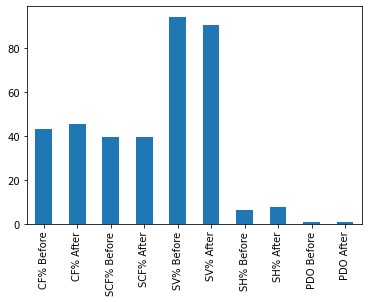

In [85]:
FCBandA1.mean().plot(kind='bar')

#### CF% (Corsi):
CF% (corsi) is used to evaluate the teams puck possession on the ice in a 5v5 setting. It is calculated by the teams total sum of shots on goal, missed shots, and blocked shots over the shots against, missed shots against and blocked shots against. The average rank of corsi is 40 to 60%. A team/player ranked above 55% is considered elite or very good. Vancouver’s CF% has seemed to increase after their 24 days off with their CF% increasing 2.5% from 43.1% to 45.6%. Vancouver doesn’t have a very high ranked coris to begin with, but does have one high outlier at 62.11% before the outbreak. What this statistic is telling us is that the Canucks had more time of possesion with the puck that resulted in more shots towrads the opponents net. This probably has to do with having more time off for rest compared to the other teams they are playing. Their CF% does seem to gain more variance and contain a larger range of values after the outbreak. This is most likely the case from having too much time off, not enough practise, and being out of their rythem on the ice.

<AxesSubplot:>

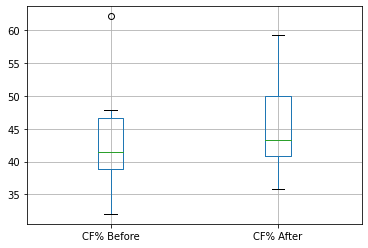

In [29]:
CanucksBandA.boxplot(['CF% Before','CF% After'])

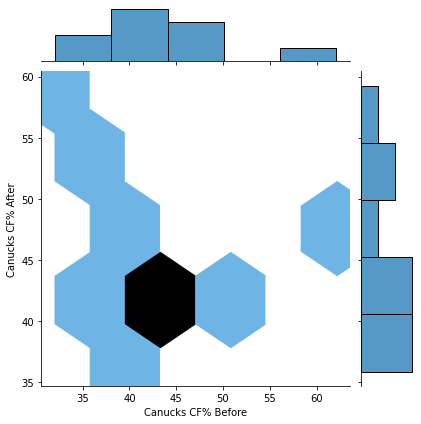

In [83]:
sns.jointplot(data=FinalCovidDataFrame, x='Canucks CF% Before', y='Canucks CF% After', kind='hex')

#### SCF% (Scoring Chances For Percentage):
SCF% (scoring chances for percentage)  is a percentage of total scoring chances in games that team played for that team. It takes into account the rate of scoring chances for and against at 60 minutes time on ice. It allows us to determine a teams overall puck possesion, becuse the more time you have with the puck, the more scoring oppertunities you'll have. Vancouver’s SCF% fell after their outbreak but not by much (.1 0f a %). There is a larger range of values after their outbreak compared to before and much more outliers exist before the outbreak. This means that the Canucks were seeing a higher rate of scoring chnaces after the outbreak rather than before. Again, this is most likely the case due to the team having such a long period of time off the ice. 

<AxesSubplot:>

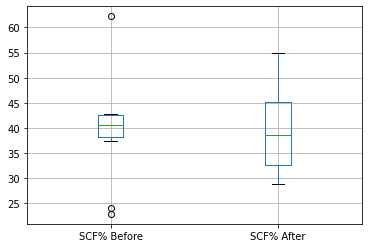

In [30]:
CanucksBandA.boxplot(['SCF% Before','SCF% After'])

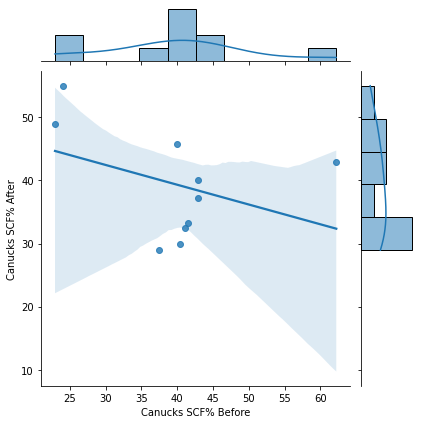

In [93]:
sns.jointplot(data=FinalCovidDataFrame, x="Canucks SCF% Before", y="Canucks SCF% After", kind="reg")

#### SH% (Shooting Percentage):
SH% (shooting percentage) allows us to measure if a team's shots on goal results in goals and determines if a team is scoring. The Vancouver Canucks saw a slight increase in shooting percentage after the outbreak of 1.4% from 6.3% to 7.7%. A larger range of values is also present after the outbreak as well. This is likely caused from the long time off, resulting in games were they are scoring more or less than usual. The one outlier on the SH% Before box plot was the game between the Canucks and Canadians were the Canucks were scoring at a crazy rate, resulting in a SH% of 23.1%. This box plot shows that Vancouver was scoring more on average after the outbreak, but was less consistent at doing so.

<AxesSubplot:>

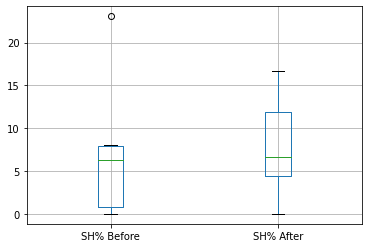

In [31]:
CanucksBandA.boxplot(['SH% Before','SH% After'])

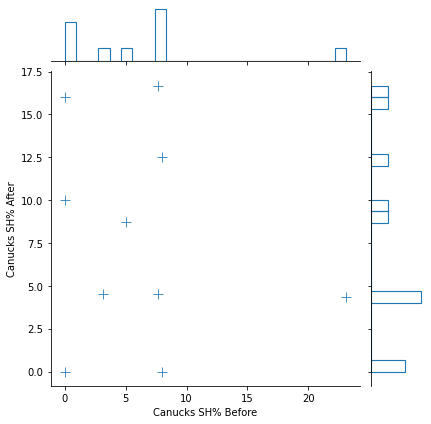

In [94]:
sns.jointplot(
    data=FinalCovidDataFrame, x="Canucks SH% Before", y="Canucks SH% After",
    marker="+", s=100, marginal_kws=dict(bins=25, fill=False),
)

#### SV% (Save Percentage):
SV% (save percentage) helps determine the play in net by analyzing the number of shots on goal a goaltender can save. This one caught me off guard a bit because I was not expecting such a drop off in save percentage. I drop in save percentage was 3.9% from 94.% before and 90.3% after. This may not seem like a large drop but in this statistic that is a drastic regression. This shows that the Canucks were getting scored on more after the outbreak rather than before. This could stem past just goaltending as well to how the team is playing in front of the goaltender. There is also more range in values after the outbreak than before. Just to clarify, some values sitting at 100% means that no goals were scored (called shutouts). This is an interesting visual because I assumed the goaltending would have been better with all the time off, but I guess that maybe too much time off can hurt you SV% stats. I guess that makes sense because if a goalie doesn’t see a large volume of shots in a game, he is more likely going to be scored on for being “cold” and not warmed up. The Canucks also had a young goaltender in net that goes by the name Thatcher Demko, who was playing in first full NHL regular season.  

<AxesSubplot:>

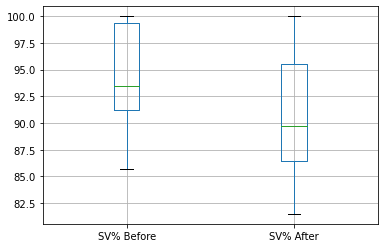

In [32]:
CanucksBandA.boxplot(['SV% Before','SV% After'])

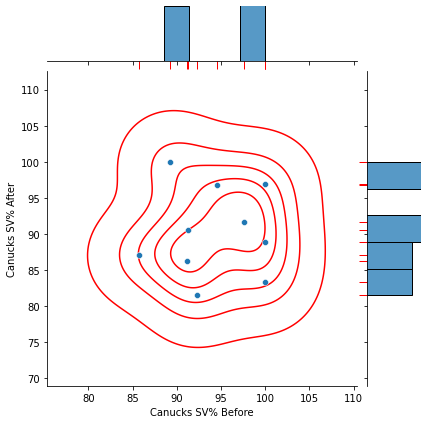

In [89]:
g = sns.jointplot(data=FinalCovidDataFrame, x="Canucks SV% Before", y="Canucks SV% After")
g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)

#### PDO:
PDO is the sum of a team's shooting percentage and its save percentage. The sum is then multiplied by ten and that total is the teams PDO. PDO is often viewed as a proxy for how lucky a team is. A PDO over 102 is “probably not as good as they seem”, while a team below 98 is likely better than they appear. The Canucks had a PDO of 1.0 before the outbreak and a 0.98 after the outbreak. This means that the Canucks were likely better than they appeared after the outbreak. This is such a cool statistics to look at because it can actually determine a teams play, which will help with this analysis greatly. I assumed the Canucks would have played worse after the outbreak rather than before. It’s important to note that the overall score of the game doesn’t determine how a team played as a whole. Luck is massively involved in the game of hockey and can make people believe things that aren’t completely true. The Canucks won 6 games in the in their 10 games before the outbreak and only won 3 games in their 10 games afterwards. But what the PDO is telling us is that the team played better statistically after the outbreak, but the final score of those games and record wouldn’t be able to tell you that.

<AxesSubplot:>

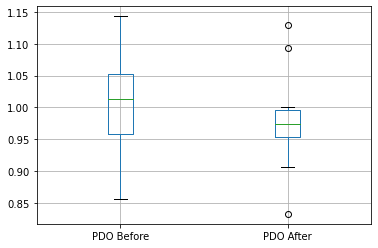

In [33]:
CanucksBandA.boxplot(['PDO Before','PDO After'])

/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '0.857'),
  Text(1, 0, '0.892'),
  Text(2, 0, '0.944'),
  Text(3, 0, '1.0'),
  Text(4, 0, '1.026'),
  Text(5, 0, '1.05'),
  Text(6, 0, '1.053'),
  Text(7, 0, '1.08'),
  Text(8, 0, '1.143')])

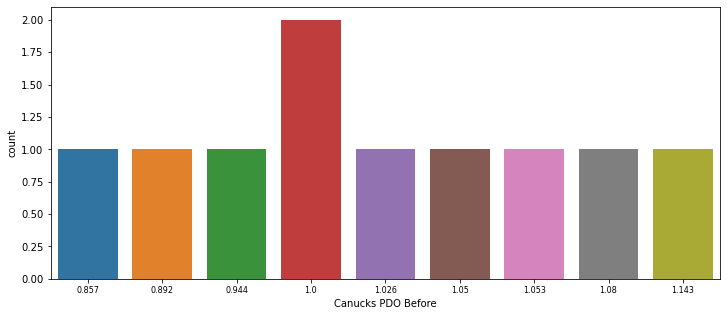

In [84]:
plt.figure(figsize=(12,5))
sns.countplot(FinalCovidDataFrame['Canucks PDO Before'])
plt.xticks(fontsize=8)

### Buffalo Sabres Before and After Covid-19 Outbreak:

#### Buffalo Sabres Visuals:
The Buffalo Sabres had 14 days off between games due to their Covid-19 outbreak. From the data, it is clear that the team didn’t play well due to their time off. This will be decided by looking at the 5v5 statistics and visulatizations of the variables for CF% (corsi percentage), SCF% (scoring chances for percentage), SH% (shooting percentage), SV% (save percentage), and PDO (SH% vs. SV%). The bar chart below gives a genral idea of the statistics before and after the outbreak. *I will be trying to create a nice bar chart for my final visualization with a secondary y-axid for PDO*.

<AxesSubplot:>

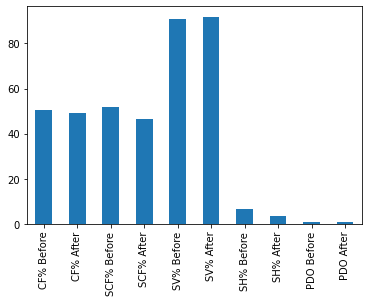

In [86]:
FSBandA1.mean().plot(kind='bar')

#### CF% (Corsi):
CF% (corsi) is used to evaluate the teams puck possession on the ice in a 5v5 setting. It is calculated by the teams total sum of shots on goal, missed shots, and blocked shots over the shots against, missed shots against and blocked shots against. The average rank of corsi is 40 to 60%. A team/player ranked above 55% is considered elite or very good. The Buffalo Sabres CF% dropped 1.7% from 50.7% before and 49% after the outbreak. This means the Sabres saw more shot attempts directed at them after their outbreak. This shows that the team was not playing as good after their outbreak. The range of values doesn’t seem to change as much as well for the play before and after. However, they did seem to have some games with higher CF% after, but the average CF% is brought down by some lower valued CF% games. I expected the Sabres to have a lower CF% as they are a poorly managed and coached team. I did expect the CF% to be lower, but it wasn’t that drastic of a change.

<AxesSubplot:>

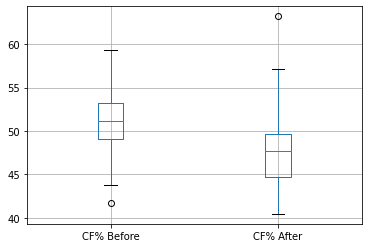

In [38]:
SabresBandA.boxplot(['CF% Before','CF% After'])

/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '40.45'),
  Text(1, 0, '44.05'),
  Text(2, 0, '44.3'),
  Text(3, 0, '45.98'),
  Text(4, 0, '47.12'),
  Text(5, 0, '48.19'),
  Text(6, 0, '48.78'),
  Text(7, 0, '50.0'),
  Text(8, 0, '57.14'),
  Text(9, 0, '63.22')])

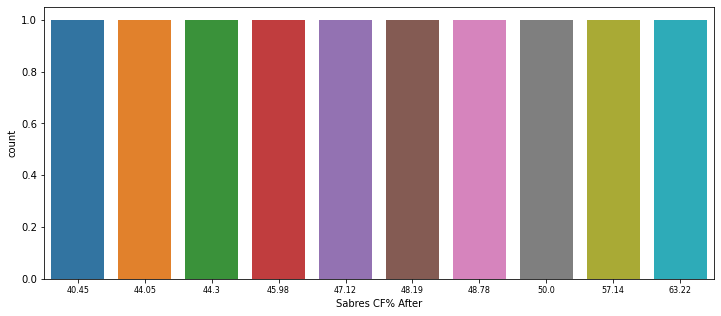

In [91]:
plt.figure(figsize=(12,5))
sns.countplot(FinalCovidDataFrame['Sabres CF% After'])
plt.xticks(fontsize=8)

#### SCF% (Scoring Chances For Percentage):
SCF% (scoring chances for percentage)  is a percentage of total scoring chances in games that team played for that team. It takes into account the rate of scoring chances for and against at 60 minutes time on ice. It allows us to determine a teams overall puck possesion, becuse the more time you have with the puck, the more scoring oppertunities you'll have. The Sabres have a lower SCF% after their outbreak compared to before. It dropped a drastic 5.1% from 51.6% before to 46.5% after the outbreak. This means the team saw less scoring opportunities, which makes sense as the CF% dropped showing they lost time with the puck, resulting in less shots on net. I expected there to be quite a drop off like this as the team was already struggling in their first 10 games before the outbreak. On the boxplot, there is a large range of lower values below the average SCF% After, helping us visualize their scoring struggles.

<AxesSubplot:>

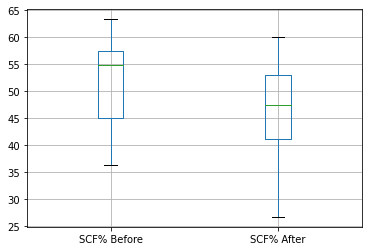

In [39]:
SabresBandA.boxplot(['SCF% Before','SCF% After'])

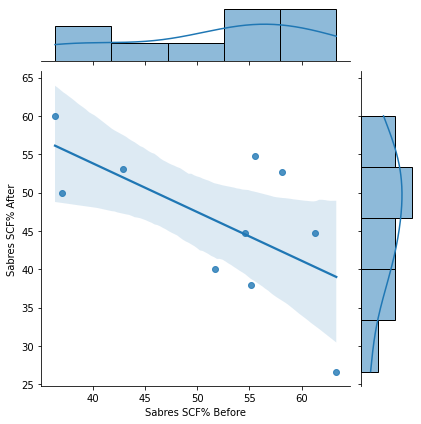

In [92]:
sns.jointplot(data=FinalCovidDataFrame, x="Sabres SCF% Before", y="Sabres SCF% After", kind="reg")


#### SH% (Shooting Percentage):
SH% (shooting percentage) allows us to measure if a team's shots on goal results in goals and determines if a team is scoring. The Sabres SH% dropped massively as expected from the previous two statistics of CF% and SCF%. The SH% dropped from a decent value of 6.8% to 3.3% (3.5% decrease). This just goes to help support how much this team struggled after their outbreak. It represents how many of their shots are registering into goals, and the main problem is that their total scoring chances have already decreased, resulting in less opportunities to score. This visual backs up my research question on the how much the Sabres struggled.

<AxesSubplot:>

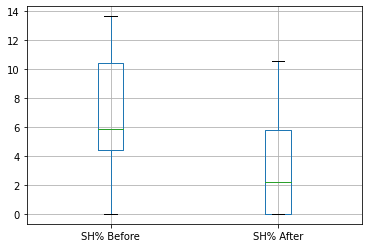

In [40]:
SabresBandA.boxplot(['SH% Before','SH% After'])

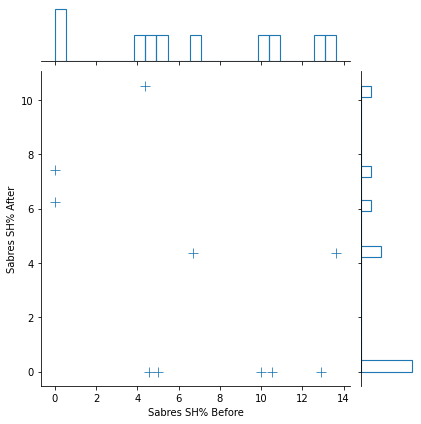

In [95]:
sns.jointplot(
    data=FinalCovidDataFrame, x="Sabres SH% Before", y="Sabres SH% After",
    marker="+", s=100, marginal_kws=dict(bins=25, fill=False),
)

#### SV% (Save Percentage):
SV% (save percentage) helps determine the play in net by analyzing the number of shots on goal a goaltender can save. This statistic caught me off guard because the team is struggling to score with a loss in SH%, SCF% and less time with the puck analyzed in with the CF%.  Somehow the Sabres managed to increase their SV% after their outbreak from 90.7% before to 91.2% after the outbreak. This means the Sabres goaltending played quite well along with the team’s defensive structure. I was not expecting this considering the trend in decreases seen above in the other statistics showing their struggles to contain the puck and score. The Sabres don’t have a strong goaltending core to start with. This must mean the break either helped the goalies, or the team played a strong defensive structured game in front of the goaltenders along with some good play from the goalies as well.

<AxesSubplot:>

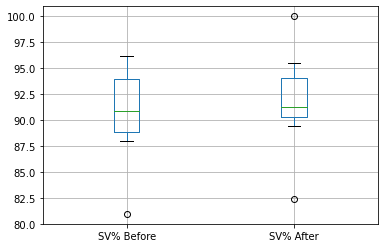

In [41]:
SabresBandA.boxplot(['SV% Before','SV% After'])

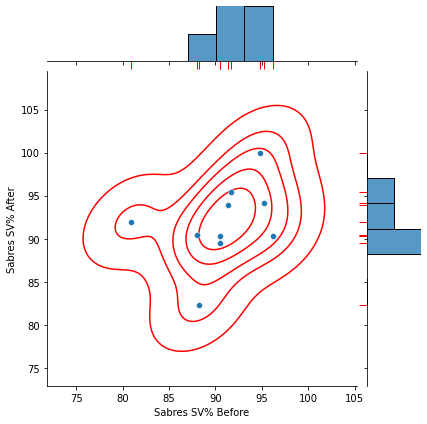

In [90]:
g = sns.jointplot(data=FinalCovidDataFrame, x="Sabres SV% Before", y="Sabres SV% After")
g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)

#### PDO:
PDO is the sum of a team's shooting percentage and its save percentage. The sum is then multiplied by ten and that total is the teams PDO. PDO is often viewed as a proxy for how lucky a team is. A PDO over 102 is “probably not as good as they seem”, while a team below 98 is likely better than they appear. The Sabres PDO is 0.98 before the outbreak and 0.95 after the outbreak. They saw a (0.3 drop in PDO before to after). By the rules of PDO, the Sabres are likely better than they appear. This is hard to visualize as they seemed to have struggles containing puck possession and having a decrease in scoring changes and shooting percentage. But the team’s overall defensive structure  and great goaltending resulting in an increase in SV% is the only thing that is helping them seem better than they appear. The Sabres only won 5 games in their 10 games before their outbreaks compared to the 3 games they won in their 10 games after the outbreak. This means that the Sabres were a bit more lucky in their 10 games before the outbreak rather than the 10 games after. The teams overall play decreased on the offensive side of the puck and increased on the defensive side of the puck after the outbreak. The Sabres seemed to be in a lot of more high scoring games before the outbreak which only supports this analysis of increased defensive play.

<AxesSubplot:>

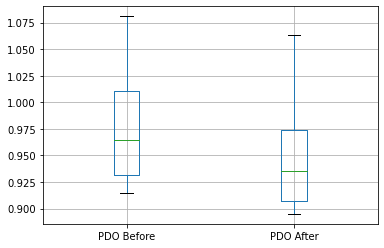

In [42]:
SabresBandA.boxplot(['PDO Before','PDO After'])

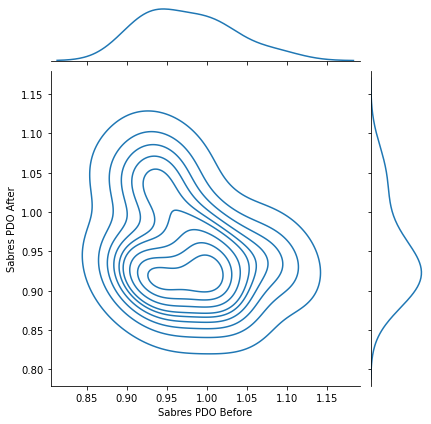

In [87]:
sns.jointplot(data=FinalCovidDataFrame, x='Sabres PDO Before', y='Sabres PDO After', kind='kde')

## Overall Analysis:
Diving in deeper to these two teams has shown me a lot on how cool statistics are in hockey and that they actual do work! The Vancouver Canucks were interesting because they saw an increase in a lot of statistics such as CF% and SH% were the Sabres did not. The PDO was a great addition for a statistic as it shows the reader if this team is getting lucky and if they aren’t. I chose these two teams specifically because the Vancouver Canucks were in a division that contained more teams of their skill level where as the Sabres are looked at more as a team trying to exit a rebuild stage and become a team that can start making playoffs. I was mostly surprised about my findings with the Sabres. I knew they would experience a decrease in offensive play, but was not expecting to find an increase in goaltending and defensive play. I will have to do more digging into that because I was not expecting that. The box plots really helped visualize the before and after play side by side to help the reader really understand how drastic of a change occurred from Covid-19 outbreaks. This analysis taught me a great deal and I can’t wait to create a beautiful looking bar chart for a better visualization.

In [52]:
# csv file for FinalCovidDataFrame
FinalCovidDataFrame.to_csv("FinalCovidDataFrame.csv", index=False)

In [53]:
# csv file for CanucksBandA
CanucksBandA.to_csv("CanucksBeforeAndAfterWithGameScores", index=False)

In [54]:
# csv file for SabresBandA
SabresBandA.to_csv("SabresBeforeAndAfterWithGameScores", index=False)

In [51]:
# csv file for FCBandA1
FCBandA1.to_csv("FinalCanucksBandA", index=False)

In [52]:
# csv file for FSBandA1
FSBandA1.to_csv("FinalSabresBandA", index=False)